### Krisha Dataset

Our task is to predict approx. cost of apartment in Almaty City

### Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('dataset.xlsx')
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,0,0,91,?,2022,?,?,?,?,31229000
1,3,монолитный,0,0,72,?,2023,?,?,?,?,27409400
2,2,монолитный,0,0,54,?,2023,?,?,?,?,20869600
3,1,монолитный,0,0,35,?,2023,?,?,?,?,19525000
4,2,монолитный,0,0,53,?,2022,?,?,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
9123,2,монолитный,6,15,72,?,2017,?,?,?,нет,40000000
9124,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,?,ламинат,нет,34500000
9125,3,кирпичный,0,4,70,хорошее,1990,?,?,линолеум,нет,42000000
9126,3,монолитный,9,11,120,хорошее,2016,?,полностью,ламинат,нет,96000000


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9128 entries, 0 to 9127
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Комнатность           9128 non-null   int64 
 1   Тип дома              9128 non-null   object
 2   Этаж                  9128 non-null   int64 
 3   Этажность дома        9128 non-null   int64 
 4   Площадь, м²           9128 non-null   int64 
 5   Состояние             9128 non-null   object
 6   Год постройки         9128 non-null   int64 
 7   Балкон                9128 non-null   object
 8   Квартира меблирована  9128 non-null   object
 9   Пол                   9128 non-null   object
 10  Бывшее общежитие      9128 non-null   object
 11  Стоимость             9128 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 855.9+ KB


In [4]:
df.shape

(9128, 12)

In [5]:
df.dtypes

Комнатность              int64
Тип дома                object
Этаж                     int64
Этажность дома           int64
Площадь, м²              int64
Состояние               object
Год постройки            int64
Балкон                  object
Квартира меблирована    object
Пол                     object
Бывшее общежитие        object
Стоимость                int64
dtype: object

In [6]:
df.describe()

,Комнатность,Этаж,Этажность дома,"Площадь, м²",Год постройки,Стоимость
count,9128.000000,9128.000000,9128.000000,9128.000000,9128.00000,9.128000e+03
mean,2.290535,4.624890,8.101665,72.256902,2002.33085,5.474575e+07
std,1.033858,3.805902,5.129630,47.535941,20.14350,5.723832e+07
min,1.000000,0.000000,0.000000,8.000000,1922.00000,3.200000e+06
25%,2.000000,2.000000,5.000000,44.000000,1984.00000,2.800000e+07
50%,2.000000,4.000000,7.000000,60.000000,2012.00000,3.900000e+07
75%,3.000000,6.000000,11.000000,84.000000,2020.00000,6.000000e+07
max,14.000000,37.000000,37.000000,740.000000,2024.00000,1.400000e+09


### Data Cleaning

In [7]:
df.drop_duplicates(ignore_index = True, inplace = True)

In [8]:
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,0,0,91,?,2022,?,?,?,?,31229000
1,3,монолитный,0,0,72,?,2023,?,?,?,?,27409400
2,2,монолитный,0,0,54,?,2023,?,?,?,?,20869600
3,1,монолитный,0,0,35,?,2023,?,?,?,?,19525000
4,2,монолитный,0,0,53,?,2022,?,?,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,?,1932,?,?,паркет,нет,119000000
8738,2,монолитный,6,15,72,?,2017,?,?,?,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,?,ламинат,нет,34500000
8740,3,кирпичный,0,4,70,хорошее,1990,?,?,линолеум,нет,42000000


In [9]:
df['Тип дома'].value_counts()

монолитный    5238
панельный     1995
кирпичный     1288
?              147
иное            74
Name: Тип дома, dtype: int64

In [10]:
df['Тип дома'].replace({'?': df['Тип дома'].value_counts().index.tolist()[0]}, inplace = True)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,0,0,91,?,2022,?,?,?,?,31229000
1,3,монолитный,0,0,72,?,2023,?,?,?,?,27409400
2,2,монолитный,0,0,54,?,2023,?,?,?,?,20869600
3,1,монолитный,0,0,35,?,2023,?,?,?,?,19525000
4,2,монолитный,0,0,53,?,2022,?,?,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,?,1932,?,?,паркет,нет,119000000
8738,2,монолитный,6,15,72,?,2017,?,?,?,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,?,ламинат,нет,34500000
8740,3,кирпичный,0,4,70,хорошее,1990,?,?,линолеум,нет,42000000


In [11]:
df['Этажность дома'].replace({0: int(np.floor(df['Этажность дома'].mean()))}, inplace = True)

In [12]:
for i in range(len(df)):
    if df['Этаж'][i] == 0:
        df['Этаж'][i] = int(np.ceil(df['Этажность дома'][i] / 2))
df


C:\Users\danii\AppData\Local\Temp\ipykernel_9836\833488901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Этаж'][i] = int(np.ceil(df['Этажность дома'][i] / 2))


,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,4,8,91,?,2022,?,?,?,?,31229000
1,3,монолитный,4,8,72,?,2023,?,?,?,?,27409400
2,2,монолитный,4,8,54,?,2023,?,?,?,?,20869600
3,1,монолитный,4,8,35,?,2023,?,?,?,?,19525000
4,2,монолитный,4,8,53,?,2022,?,?,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,?,1932,?,?,паркет,нет,119000000
8738,2,монолитный,6,15,72,?,2017,?,?,?,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,?,ламинат,нет,34500000
8740,3,кирпичный,2,4,70,хорошее,1990,?,?,линолеум,нет,42000000


In [13]:
df['Состояние'].value_counts()

хорошее                 5107
?                       1960
среднее                  575
черновая отделка         559
свободная планировка     310
требует ремонта          231
Name: Состояние, dtype: int64

In [14]:
df['Состояние'].replace({'?': 'Неизвестно о состоянии'}, inplace = True)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,?,?,?,?,31229000
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,?,?,?,?,27409400
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,?,?,?,?,20869600
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,?,?,?,?,19525000
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,?,?,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,?,?,паркет,нет,119000000
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,?,?,?,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,?,ламинат,нет,34500000
8740,3,кирпичный,2,4,70,хорошее,1990,?,?,линолеум,нет,42000000


In [15]:
df['Балкон'].value_counts()

?                                4559
балкон                           2400
лоджия                            938
несколько балконов или лоджий     509
балкон и лоджия                   336
Name: Балкон, dtype: int64

In [16]:
df['Балкон'].replace({'?': 'Неизвестно о наличии балкона'}, inplace = True)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,?,?,?,31229000
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,?,?,?,27409400
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,?,?,?,20869600
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,?,?,?,19525000
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,?,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,Неизвестно о наличии балкона,?,паркет,нет,119000000
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,Неизвестно о наличии балкона,?,?,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,?,ламинат,нет,34500000
8740,3,кирпичный,2,4,70,хорошее,1990,Неизвестно о наличии балкона,?,линолеум,нет,42000000


In [17]:
df['Квартира меблирована'].value_counts()

?             5287
частично      1674
полностью     1408
без мебели     373
Name: Квартира меблирована, dtype: int64

In [18]:
df['Квартира меблирована'].replace({'?': 'Неизвестно о меблированности'}, inplace = True)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,?,?,31229000
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,?,?,27409400
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,?,?,20869600
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,?,?,19525000
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,?,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,Неизвестно о наличии балкона,Неизвестно о меблированности,паркет,нет,119000000
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,Неизвестно о наличии балкона,Неизвестно о меблированности,?,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,Неизвестно о меблированности,ламинат,нет,34500000
8740,3,кирпичный,2,4,70,хорошее,1990,Неизвестно о наличии балкона,Неизвестно о меблированности,линолеум,нет,42000000


In [19]:
df['Пол'].value_counts()

?            4384
ламинат      2621
линолеум     1179
паркет        491
дерево         48
плитка         14
пробковый       3
ковролан        2
Name: Пол, dtype: int64

In [20]:
df['Пол'].replace({'?': 'Неизвестно о виде пола'}, inplace = True)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,?,31229000
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,?,27409400
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,?,20869600
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,?,19525000
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,?,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,Неизвестно о наличии балкона,Неизвестно о меблированности,паркет,нет,119000000
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,Неизвестно о меблированности,ламинат,нет,34500000
8740,3,кирпичный,2,4,70,хорошее,1990,Неизвестно о наличии балкона,Неизвестно о меблированности,линолеум,нет,42000000


In [21]:
df['Бывшее общежитие'].value_counts()

нет    7597
?       969
да      176
Name: Бывшее общежитие, dtype: int64

In [22]:
df['Бывшее общежитие'].replace({'?': 'нет'}, inplace = True)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,31229000
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,27409400
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,20869600
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,19525000
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,19673500
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,Неизвестно о наличии балкона,Неизвестно о меблированности,паркет,нет,119000000
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,40000000
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,Неизвестно о меблированности,ламинат,нет,34500000
8740,3,кирпичный,2,4,70,хорошее,1990,Неизвестно о наличии балкона,Неизвестно о меблированности,линолеум,нет,42000000


### Feature Engineering

Add one more new feature 'Стоимость за м²', which mean the cost of 1 square feet of apartment.

In [23]:
df['Стоимость за м²'] = df.apply(lambda row: round(row['Стоимость'] / row['Площадь, м²'], 2), axis=1).astype('int64')

In [24]:
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость,Стоимость за м²
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,31229000,343175
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,27409400,380686
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,20869600,386474
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,19525000,557857
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,19673500,371198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,Неизвестно о наличии балкона,Неизвестно о меблированности,паркет,нет,119000000,716867
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,40000000,555555
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,Неизвестно о меблированности,ламинат,нет,34500000,472602
8740,3,кирпичный,2,4,70,хорошее,1990,Неизвестно о наличии балкона,Неизвестно о меблированности,линолеум,нет,42000000,600000


Replace the cost of apartments with their classes according to this table:
From 0 to 20M tenge - class 0
From 20M to 30M tenge - class 1
From 30M to 40M tenge - class 2
From 40M to 50M tenge - class 3
From 50M to 60M tenge - class 4
From 60M to infinity tenge - class 5

In [25]:
def func(cost):
    if cost >= 60000000:
        return 5
    
    cluster = 0
    
    while cost >= 20000000:
        cluster += 1
        cost -= 10000000
    
    return cluster

In [26]:
df['Стоимость'] = df['Стоимость'].apply(func)
df

,Комнатность,Тип дома,Этаж,Этажность дома,"Площадь, м²",Состояние,Год постройки,Балкон,Квартира меблирована,Пол,Бывшее общежитие,Стоимость,Стоимость за м²
0,3,монолитный,4,8,91,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,2,343175
1,3,монолитный,4,8,72,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,1,380686
2,2,монолитный,4,8,54,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,1,386474
3,1,монолитный,4,8,35,Неизвестно о состоянии,2023,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,0,557857
4,2,монолитный,4,8,53,Неизвестно о состоянии,2022,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,0,371198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,кирпичный,2,3,166,Неизвестно о состоянии,1932,Неизвестно о наличии балкона,Неизвестно о меблированности,паркет,нет,5,716867
8738,2,монолитный,6,15,72,Неизвестно о состоянии,2017,Неизвестно о наличии балкона,Неизвестно о меблированности,Неизвестно о виде пола,нет,3,555555
8739,3,кирпичный,2,3,73,хорошее,1961,несколько балконов или лоджий,Неизвестно о меблированности,ламинат,нет,2,472602
8740,3,кирпичный,2,4,70,хорошее,1990,Неизвестно о наличии балкона,Неизвестно о меблированности,линолеум,нет,3,600000


### Analysis

### 1

<AxesSubplot:xlabel='Год постройки', ylabel='Этажность дома'>

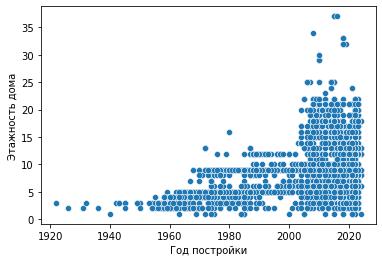

In [27]:

sns.scatterplot(x = 'Год постройки', y = 'Этажность дома', data = df)

note: we see that, in general, new buildings are higher than older ones.

### 2

(0.0, 6.0)

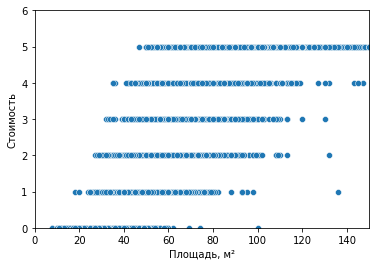

In [28]:
ax = sns.scatterplot(x = 'Площадь, м²', y = 'Стоимость', data = df)
ax.set_xlim(0, 150)
ax.set_ylim(0, 6)

note: By increasing of cost, also increases the lower bound of square feet. 

### 3

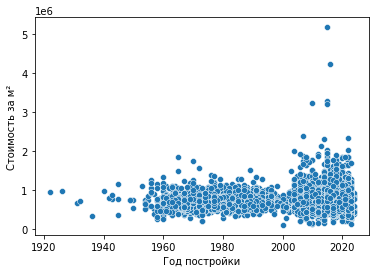

In [29]:
ax = sns.scatterplot(x = 'Год постройки', y = 'Стоимость за м²', data = df)

<AxesSubplot:xlabel='Год постройки'>

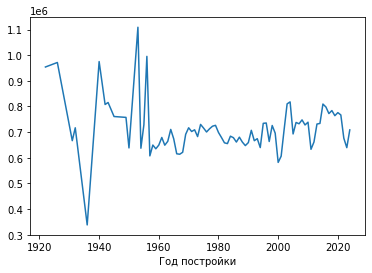

In [30]:
df.groupby('Год постройки')['Стоимость за м²'].mean().astype('int64').plot()

note: The cost of 1 square feet of new flat are similar to cost of 1 square feet of older flat.We detect that the cost of 1 square feet in buildings of 1920-1960 years have high bias.

### 4

<AxesSubplot:xlabel='Комнатность'>

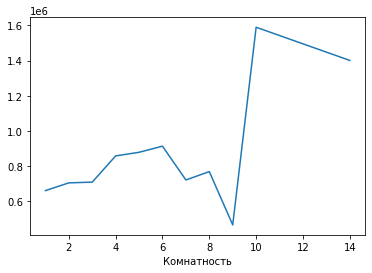

In [31]:
df.groupby('Комнатность')['Стоимость за м²'].mean().astype('int64').plot()

The most expensive cost per 1 square feet is 10 room flats. The lowest cost per 1 square feet is 9 room flats. 
Do you see the difference?
In approtiate way, we should remove the outliers in the form of 10-14 room apartments.

### Implement One Hot Encoder cause all object type attributes have no more than 10 unique values. 

In [32]:
l = list(df.select_dtypes(include = 'object'))
for i in l:
    df[i] = df[i].astype('category')
df = pd.get_dummies(df, ['Тип дома','Состояние', 'Балкон', 'Квартира меблирована', 'Пол','Бывшее общежитие'])

In [33]:
df

,Комнатность,Этаж,Этажность дома,"Площадь, м²",Год постройки,Стоимость,Стоимость за м²,Тип дома_иное,Тип дома_кирпичный,Тип дома_монолитный,...,Пол_Неизвестно о виде пола,Пол_дерево,Пол_ковролан,Пол_ламинат,Пол_линолеум,Пол_паркет,Пол_плитка,Пол_пробковый,Бывшее общежитие_да,Бывшее общежитие_нет
0,3,4,8,91,2022,2,343175,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,3,4,8,72,2023,1,380686,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,2,4,8,54,2023,1,386474,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,4,8,35,2023,0,557857,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,2,4,8,53,2022,0,371198,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,4,2,3,166,1932,5,716867,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8738,2,6,15,72,2017,3,555555,0,0,1,...,1,0,0,0,0,0,0,0,0,1
8739,3,2,3,73,1961,2,472602,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8740,3,2,4,70,1990,3,600000,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### Find Correlations

In [34]:
df.corr()

,Комнатность,Этаж,Этажность дома,"Площадь, м²",Год постройки,Стоимость,Стоимость за м²,Тип дома_иное,Тип дома_кирпичный,Тип дома_монолитный,...,Пол_Неизвестно о виде пола,Пол_дерево,Пол_ковролан,Пол_ламинат,Пол_линолеум,Пол_паркет,Пол_плитка,Пол_пробковый,Бывшее общежитие_да,Бывшее общежитие_нет
Комнатность,1.000000,0.040238,0.046770,0.794130,0.028193,0.679739,0.194281,0.013787,-0.015428,0.041089,...,-0.051582,0.004524,0.010323,0.040020,-0.114076,0.196592,-0.000200,0.036418,-0.149856,0.149856
Этаж,0.040238,1.000000,0.674029,0.119363,0.328311,0.204997,0.147918,-0.057117,-0.228007,0.361161,...,0.031484,-0.048523,-0.004015,0.075412,-0.153157,0.026445,-0.018575,0.017377,-0.086897,0.086897
Этажность дома,0.046770,0.674029,1.000000,0.149670,0.524974,0.323822,0.226334,-0.075978,-0.334623,0.561990,...,0.039650,-0.071944,-0.011572,0.123104,-0.241165,0.055227,-0.030031,0.006785,-0.128826,0.128826
"Площадь, м²",0.794130,0.119363,0.149670,1.000000,0.244732,0.658176,0.286973,0.007720,-0.082612,0.252894,...,0.016795,-0.018401,-0.002517,-0.006280,-0.182381,0.248456,0.002821,0.046309,-0.144507,0.144507
Год постройки,0.028193,0.328311,0.524974,0.244732,1.000000,0.248984,0.074810,-0.026788,-0.414383,0.852315,...,0.208018,-0.114399,-0.009965,0.024478,-0.320137,0.011928,-0.001165,0.001790,-0.181263,0.181263
Стоимость,0.679739,0.204997,0.323822,0.658176,0.248984,1.000000,0.549987,-0.035870,-0.053663,0.268132,...,-0.036002,-0.035836,-0.001862,0.128813,-0.257753,0.214987,-0.006631,0.025258,-0.210355,0.210355
Стоимость за м²,0.194281,0.147918,0.226334,0.286973,0.074810,0.549987,1.000000,-0.048562,0.023248,0.109111,...,-0.057874,-0.021687,-0.002320,0.069341,-0.148465,0.218024,-0.017236,0.000426,-0.040786,0.040786
Тип дома_иное,0.013787,-0.057117,-0.075978,0.007720,-0.026788,-0.035870,-0.048562,1.000000,-0.038408,-0.117024,...,-0.012761,0.077619,-0.001398,-0.019584,0.022005,0.009999,-0.003701,-0.001712,0.004535,-0.004535
Тип дома_кирпичный,-0.015428,-0.228007,-0.334623,-0.082612,-0.414383,-0.053663,0.023248,-0.038408,1.000000,-0.526478,...,-0.118067,0.078299,0.015052,-0.006455,0.126884,0.045779,0.055992,-0.007702,0.133431,-0.133431
Тип дома_монолитный,0.041089,0.361161,0.561990,0.252894,0.852315,0.268132,0.109111,-0.117024,-0.526478,1.000000,...,0.154051,-0.078194,-0.003608,0.053636,-0.296942,0.028141,-0.021315,0.001930,-0.169823,0.169823


<AxesSubplot:>

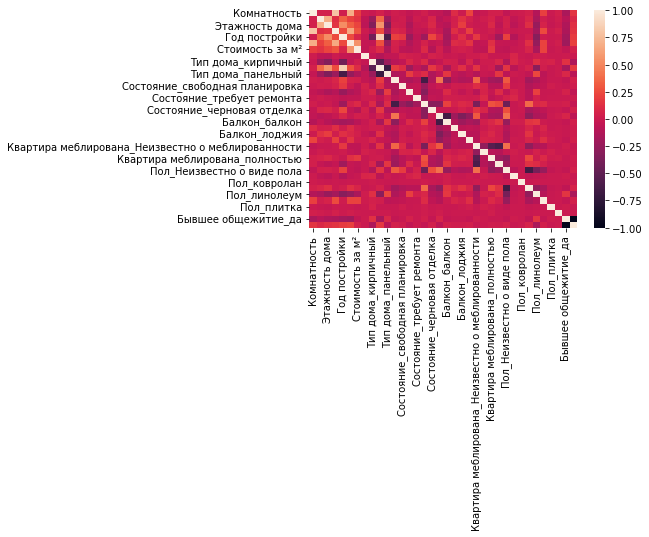

In [35]:
sns.heatmap(df.corr())

### Split dataset into Training and Testing sets

In [36]:
X = df.drop(['Стоимость'], axis = 1)
X.head()

,Комнатность,Этаж,Этажность дома,"Площадь, м²",Год постройки,Стоимость за м²,Тип дома_иное,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,...,Пол_Неизвестно о виде пола,Пол_дерево,Пол_ковролан,Пол_ламинат,Пол_линолеум,Пол_паркет,Пол_плитка,Пол_пробковый,Бывшее общежитие_да,Бывшее общежитие_нет
0,3,4,8,91,2022,343175,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,3,4,8,72,2023,380686,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,2,4,8,54,2023,386474,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,4,8,35,2023,557857,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,2,4,8,53,2022,371198,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [37]:
y = df['Стоимость']
y.head()

0    2
1    1
2    1
3    0
4    0
Name: Стоимость, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
y_test

5026    5
4141    1
507     3
5771    4
6107    2
       ..
5764    2
3397    4
4496    2
5226    3
1326    5
Name: Стоимость, Length: 2186, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)

In [41]:
scaled_X_test = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)
X_test.head()

,Комнатность,Этаж,Этажность дома,"Площадь, м²",Год постройки,Стоимость за м²,Тип дома_иное,Тип дома_кирпичный,Тип дома_монолитный,Тип дома_панельный,...,Пол_Неизвестно о виде пола,Пол_дерево,Пол_ковролан,Пол_ламинат,Пол_линолеум,Пол_паркет,Пол_плитка,Пол_пробковый,Бывшее общежитие_да,Бывшее общежитие_нет
0,0.676855,1.129635,1.354502,0.774146,0.762919,2.107630,-0.09198,-0.419732,0.796303,-0.546329,...,-1.003361,-0.076354,-0.017469,1.521335,-0.391162,-0.243865,-0.037077,-0.017469,-0.143899,0.143899
1,-1.250381,-0.535420,-0.966159,-0.782211,-2.011564,0.112108,-0.09198,2.382472,-1.255804,-0.546329,...,0.996650,-0.076354,-0.017469,-0.657318,-0.391162,-0.243865,-0.037077,-0.017469,-0.143899,0.143899
2,-0.286763,1.407144,0.932563,-0.201171,1.010641,0.137237,-0.09198,-0.419732,0.796303,-0.546329,...,0.996650,-0.076354,-0.017469,-0.657318,-0.391162,-0.243865,-0.037077,-0.017469,-0.143899,0.143899
3,-0.286763,0.852126,0.721594,-0.159668,0.663831,0.420828,-0.09198,-0.419732,0.796303,-0.546329,...,-1.003361,-0.076354,-0.017469,1.521335,-0.391162,-0.243865,-0.037077,-0.017469,-0.143899,0.143899
4,-1.250381,1.129635,0.088687,-0.470940,0.118843,-0.297503,-0.09198,-0.419732,0.796303,-0.546329,...,0.996650,-0.076354,-0.017469,-0.657318,-0.391162,-0.243865,-0.037077,-0.017469,-0.143899,0.143899


## Build the Model

Import essential tools

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Support Vector Classication

In [43]:

SVM_clf = SVC()
SVM_clf.fit(X_train, y_train)
prediction = SVM_clf.predict(X_test)

In [44]:
confusion_matrix(y_test, prediction)

array([[102,  70,   1,   0,   0,   1],
       [ 29, 347,  80,   1,   0,   2],
       [  4,  52, 389,  62,   0,   1],
       [  1,   2,  80, 226,  11,   3],
       [  1,   1,  14,  93,  38,  38],
       [  2,   1,   1,  12,  17, 504]], dtype=int64)

In [45]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       174
           1       0.73      0.76      0.74       459
           2       0.69      0.77      0.73       508
           3       0.57      0.70      0.63       323
           4       0.58      0.21      0.30       185
           5       0.92      0.94      0.93       537

    accuracy                           0.73      2186
   macro avg       0.70      0.66      0.66      2186
weighted avg       0.73      0.73      0.72      2186



In [46]:
print('Accuracy of Logistic Regression : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Logistic Regression : 73.47%


### Logistic Regression

In [47]:

logistic_regressor = LogisticRegression()
lg_clf = logistic_regressor.fit(X_train,y_train)
lg_clf.fit(X_train, y_train)
prediction = lg_clf.predict(X_test)

C:\Users\danii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [48]:
confusion_matrix(y_test, prediction)

array([[148,  26,   0,   0,   0,   0],
       [ 15, 393,  49,   1,   0,   1],
       [  0,  35, 431,  39,   2,   1],
       [  0,   0,  63, 241,  17,   2],
       [  0,   0,   0,  73,  75,  37],
       [  0,   0,   0,   0,  21, 516]], dtype=int64)

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       174
           1       0.87      0.86      0.86       459
           2       0.79      0.85      0.82       508
           3       0.68      0.75      0.71       323
           4       0.65      0.41      0.50       185
           5       0.93      0.96      0.94       537

    accuracy                           0.83      2186
   macro avg       0.80      0.78      0.79      2186
weighted avg       0.82      0.83      0.82      2186



In [50]:
print('Accuracy of Logistic Regression : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Logistic Regression : 82.53%


### Random Forest Classication

In [51]:



forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
prediction = forest_clf.predict(X_test)

In [52]:
confusion_matrix(y_test, prediction)

array([[141,  33,   0,   0,   0,   0],
       [ 15, 393,  48,   2,   0,   1],
       [  0,  41, 429,  36,   1,   1],
       [  0,   0,  50, 260,  11,   2],
       [  0,   0,   2,  51, 110,  22],
       [  0,   0,   0,   1,   3, 533]], dtype=int64)

In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       174
           1       0.84      0.86      0.85       459
           2       0.81      0.84      0.83       508
           3       0.74      0.80      0.77       323
           4       0.88      0.59      0.71       185
           5       0.95      0.99      0.97       537

    accuracy                           0.85      2186
   macro avg       0.86      0.82      0.83      2186
weighted avg       0.86      0.85      0.85      2186



In [54]:
print('Accuracy of Random Forest : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Random Forest : 85.36%


### Decision Tree

In [55]:

tree_clf = DecisionTreeClassifier(max_depth=30)
tree_clf.fit(X_train, y_train)
prediction = tree_clf.predict(X_test)

In [56]:
confusion_matrix(y_test, prediction)

array([[169,   5,   0,   0,   0,   0],
       [  8, 439,  12,   0,   0,   0],
       [  0,  12, 480,  15,   1,   0],
       [  0,   1,   9, 302,  11,   0],
       [  0,   1,   0,  12, 168,   4],
       [  0,   0,   0,   0,  10, 527]], dtype=int64)

In [57]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       174
           1       0.96      0.96      0.96       459
           2       0.96      0.94      0.95       508
           3       0.92      0.93      0.93       323
           4       0.88      0.91      0.90       185
           5       0.99      0.98      0.99       537

    accuracy                           0.95      2186
   macro avg       0.94      0.95      0.95      2186
weighted avg       0.95      0.95      0.95      2186



In [58]:
print('Accuracy of Decision Tree : ', round(100 * accuracy_score(y_test, prediction), 2), '%', sep ='')

Accuracy of Decision Tree : 95.38%


### Conclusion

As a result, we have best accuracy score with Decision Tree Classification. We scored approx. 96% using this model.

As you mentioned I declared 6 classes of cost.I tried to declare about 20 classes, but the average accuracy score was 50-60%,  